# 🎮 Predicción de abandono y evaluación de engagement en videojuegos online.
Este proyecto esta elaborado con un dataset de Kaggle llamado "Predict Online Gaming Behavior Dataset" [[Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/code)]

## Objetivo
desarrollar un sistema que prediga el abandono de jugadores (churn) y evalúe el potencial de engagement de un videojuego en etapas de diseño. Incluye un modelo de machine learning, un análisis de factores clave, un dashboard interactivo con un sistema de recomendaciones prácticas y una aplicación donde los usuarios puedan cargar sus propios datos para probar el modelo.

## Features

### Datos demográficos:
- PlayerID: Identificador único del jugador.
- Age: Edad del jugador.
- Gender: Género del jugador.
- Location: Ubicación geográfica del jugador.

### Datos del juego:
- GameGenre: Género del juego en el que el jugador está involucrado (e.g., RPG, Strategy, Action).
- GameDifficulty: Dificultad del juego, categorizada como Fácil, Media o Difícil.
- PlayerLevel: Nivel actual del jugador en el juego.
- AchievementsUnlocked: Número de logros desbloqueados por el jugador.

### Métricas de engagement:
- PlayTimeHours: Promedio de horas jugadas por sesión.
- InGamePurchases: Indica si el jugador realiza compras dentro del juego (0 = No, 1 = Sí).
- SessionsPerWeek: Número de sesiones de juego por semana.
- AvgSessionDurationMinutes: Duración promedio de cada sesión de juego en minutos.

### Variable objetivo:
- EngagementLevel: La variable objetivo categoriza el nivel de engagement del jugador en tres categorías: Bajo, Medio y Alto.

### Dataset:
- [Predict Online Gaming Behavior Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/code)
- Este dataset contiene 40,034 player entries y 13 features.
- Features es un mix de datos numericos y categoricos.
- No presenta valores nulos.

## Objetivo de este notebook
- Explorar los datos y entender la distribución de las variables.
- Identificar patrones y relaciones entre las variables.
- Preparar los datos para el modelado.
- Desarrollar un modelo de machine learning para predecir el abandono de jugadores.
- Proporcionar insights para diseñadores de juegos.
- Optimizar Engagement Strategies.


In [46]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
import plotly.colors as colors
import plotly.figure_factory as ff
import plotly.graph_objects as go



In [47]:
# Cargar el dataset
df = pd.read_csv('online_gaming_behavior_dataset.csv')

# Mostrar las primeras filas del dataset
df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [48]:
# Información general del dataset
df.info()

# Descripción estadística del dataset
df.describe()

# shape del dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

(40034, 13)

### Insights Del Dataset
* El Dataset tiene 40.034 rows y 13 columnas
* Features:
    * 7 son variables numericas ('Age', 'PlayerLevel', 'AchievementsUnlocked', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes')
    * 5 son variables categóriacas (Gender', 'GameGenre', 'GameDifficulty', 'InGamePurchases', 'EngagementLevel')
* No hay valores nulos

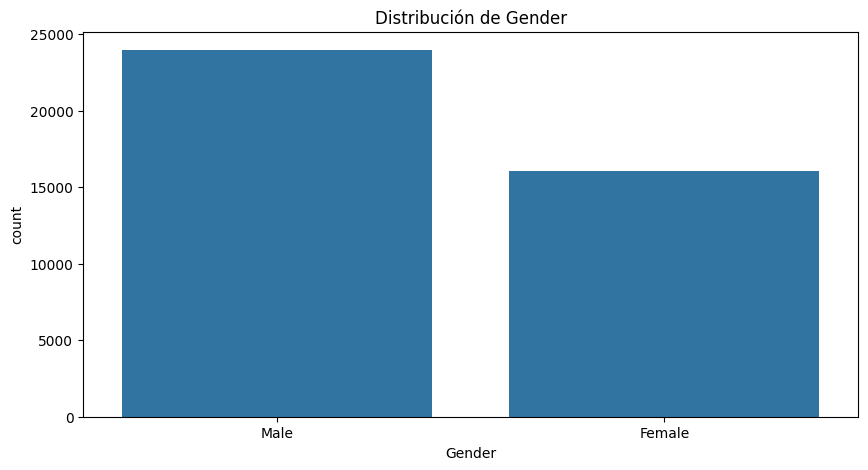

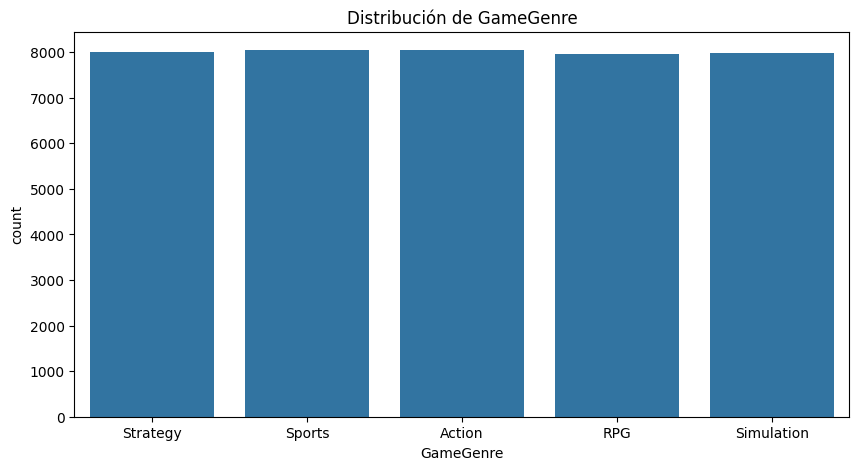

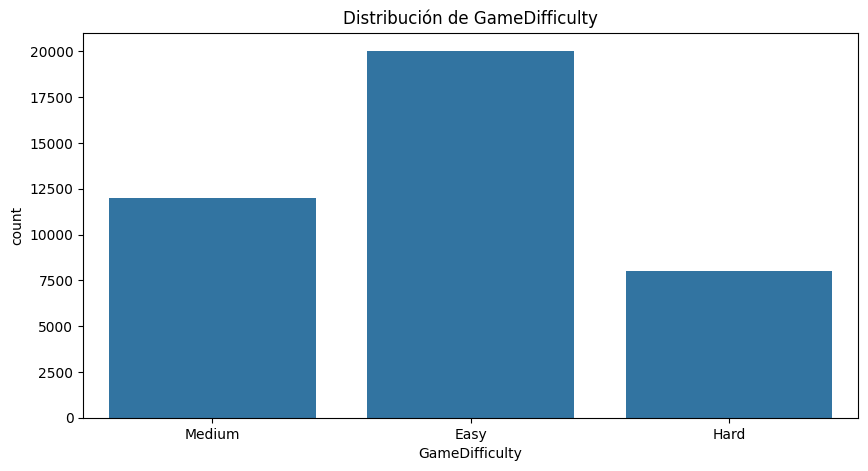

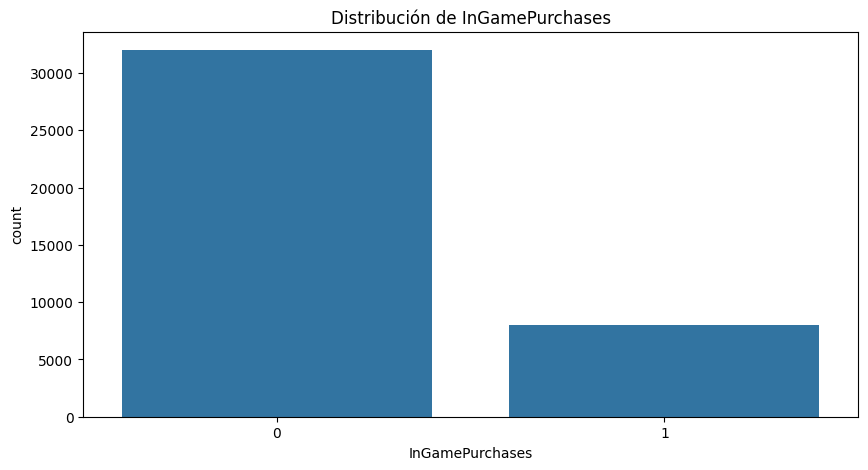

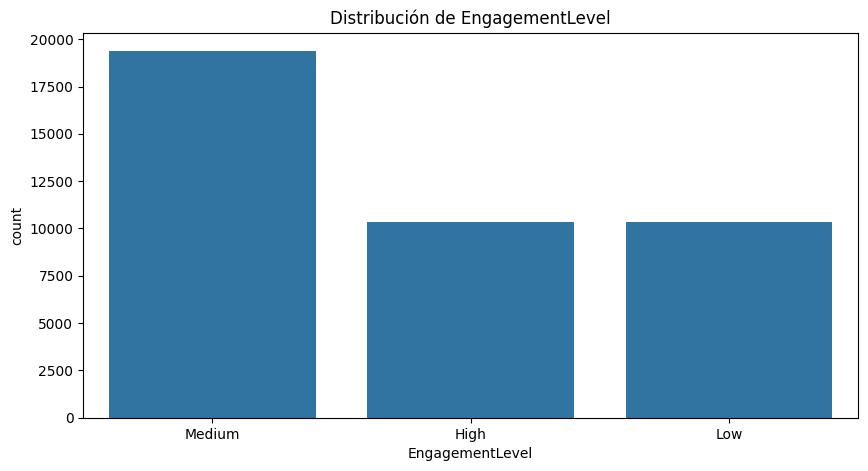

In [49]:
# Distribución de las variables categóricas
categorical_features = ['Gender', 'GameGenre', 'GameDifficulty', 'InGamePurchases', 'EngagementLevel']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribución de {feature}')
    plt.show()


* Gender
    - Podemos notar que la mayoría de los jugadores son masculinos, tambiés es notorio el aumento de jugadores femeninas, un dato que podemos explotar par aumentar ese sector y llegar a más público.
* GameGenre
    - los datos estan equilibrados en generos de juegos.
* GameDifficulty 
    - Los jugadores mayoritariamente definen los juegos fáciles y un pequeño porcentaje en dificiles.
* InGamePurchases
    - Vemos que pocos jugadores gastan dinero dentro de los juegos lo cual pude ser relevante para estudiar su monetización y el comportamiento de los que si hacen compras en el juego.
* EngagementLevel 
    - En este gráfico podemos ver que el compromiso de los jugadores es medio, y los niveles de compromiso alto y bajo estan igualados, podemos sacar en conclusion que generalemente los jugares tienen un perfil medio de actividad dentro del juego.

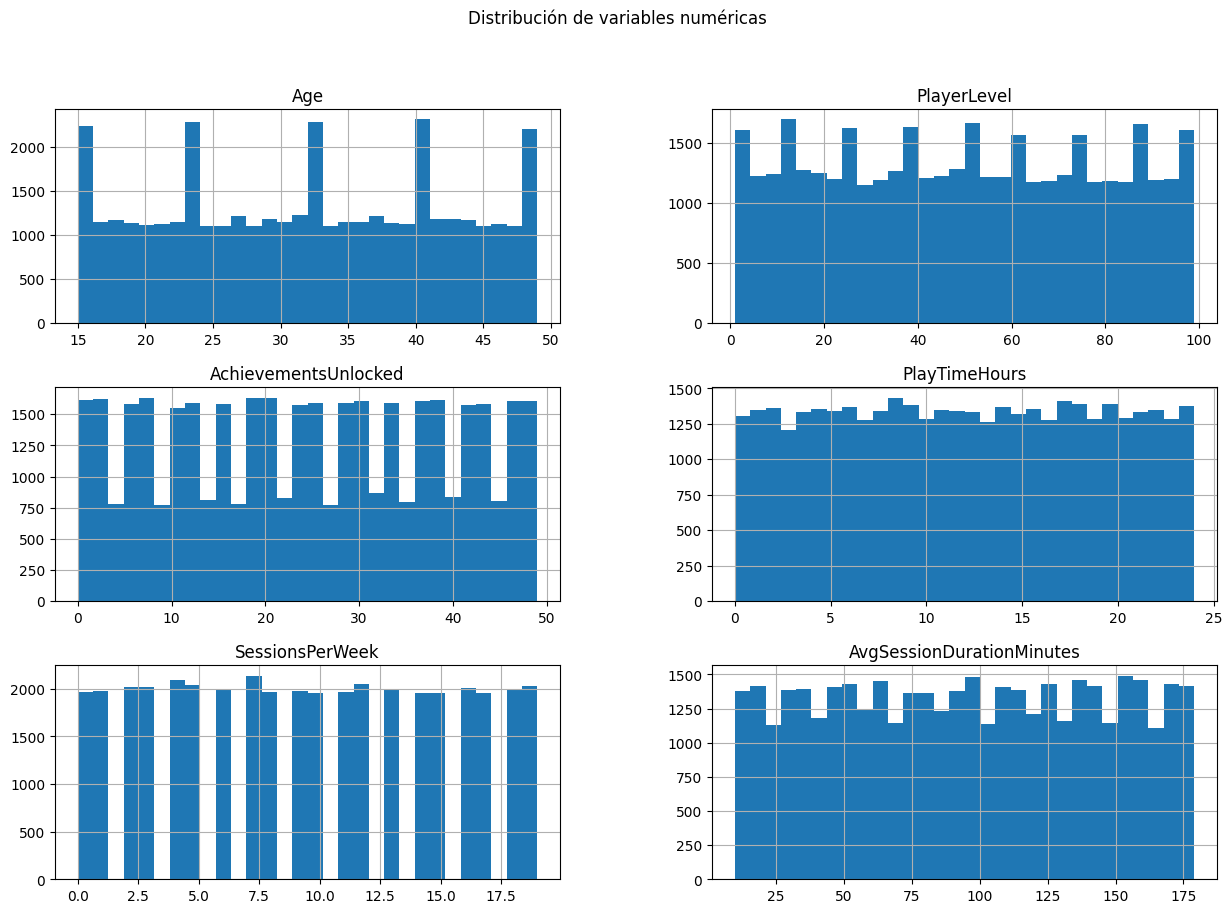

In [50]:
# Distribución de las variables numéricas
numerical_features = ['Age', 'PlayerLevel', 'AchievementsUnlocked', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()


* Age
    - En la ditribución notamos que hay picos específicas en 20, 30 y 40 años, lo que sugiere una agrupación de jugadores en estas edades
* PlayerLevel
    - El nivel de los jugadores está bastante uniforme, lo que indica una distribución balanceada de niveles en el dataset.
* AchievementsUnlocked
    - Como en el anterior los valores de los logros desbloqueados estan distribuidos de manerda equilibrada.
* PlaytimeHours
    - La myoria de los jugadores tiene tiempos de juegos uniformes con pocas fluctuaciones.
* SessionesPerWeek
    - Hay una distribucion balanceada, aunque podemos ver un leve aumento o disminucion en ciertas sesiones.
* AvgSessionDurationMinutes
    - Los jugadores tienen una distribucion de duracion promedio bastante uniforme, con ligeros altibajos.

En general este dataset tiene valores distribuidos uniformemente en la mayoria de las variables, en las edades podemos tener unos picos notorios que nos podra ser útil para entender los patrones de los jugadores.

## Unique value exploration

In [51]:
# Número de valores únicos en cada columna
unique_values = df.nunique()
print("Number of unique values in each column:")
print(unique_values)

Number of unique values in each column:
PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64


In [52]:
# Listas de columnas numéricas y categóricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

#  Imprimir las listas de columnas
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", non_numerical_columns)

Numerical Columns:
 ['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

Categorical Columns:
 ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']


In [53]:
# Imprimir los valores únicos de las columnas categóricas
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Gender
Unique Values: ['Male' 'Female']

Column: Location
Unique Values: ['Other' 'USA' 'Europe' 'Asia']

Column: GameGenre
Unique Values: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']

Column: GameDifficulty
Unique Values: ['Medium' 'Easy' 'Hard']

Column: EngagementLevel
Unique Values: ['Medium' 'High' 'Low']


Este solo se ve mas bonito!

C:\Users\vitta\AppData\Local\Temp\ipykernel_19944\1115747335.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




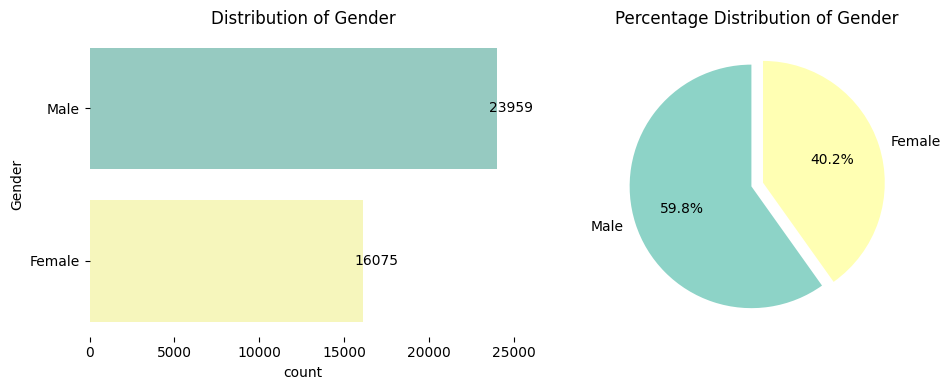

C:\Users\vitta\AppData\Local\Temp\ipykernel_19944\1115747335.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




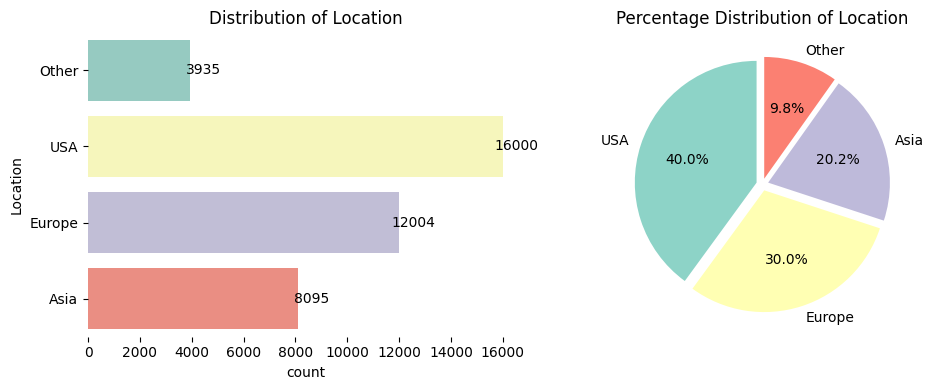

C:\Users\vitta\AppData\Local\Temp\ipykernel_19944\1115747335.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




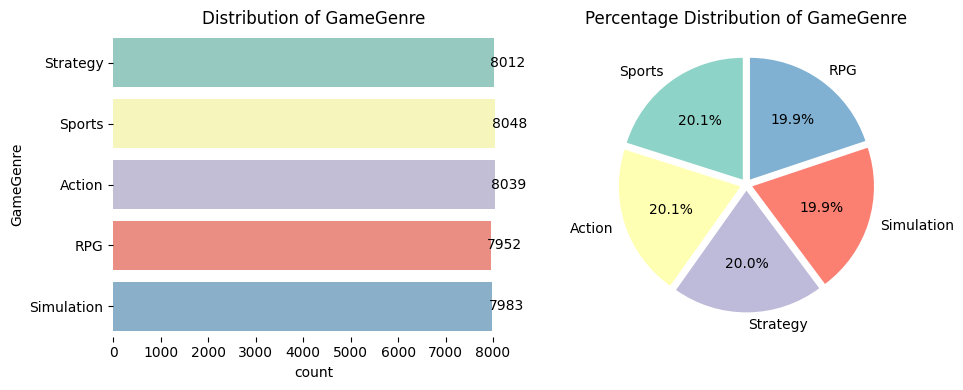

C:\Users\vitta\AppData\Local\Temp\ipykernel_19944\1115747335.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




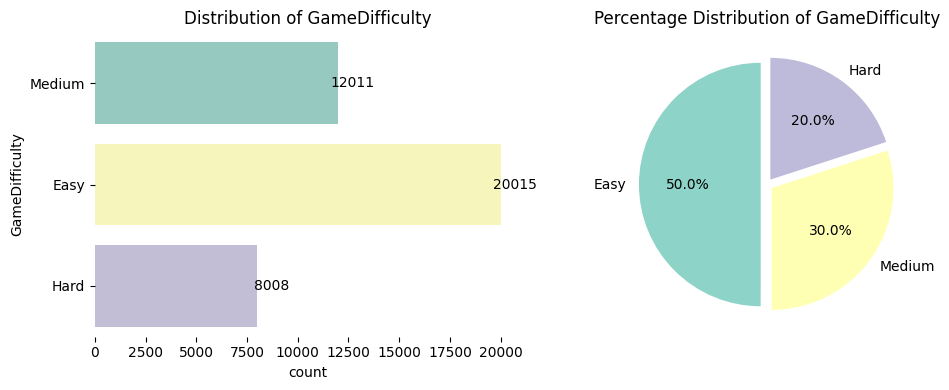

In [54]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette='Set3')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), 
                                              startangle=90, explode=[0.05]*data[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for feature in categorical_features:
    plot_categorical_distribution(feature, df)

## Análisis de relaciones entre las variables


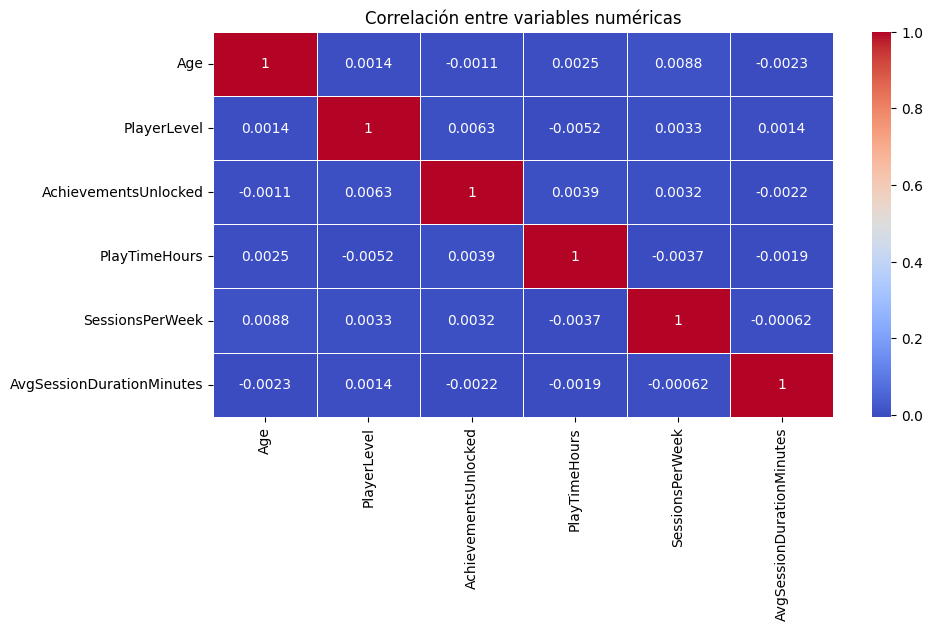

In [55]:
# Vamos a identificar relaciones entre variables
# Relación entre variables numéricas
plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre variables numéricas')
plt.show()

* Análisis:
No vemos una relacion lineal fuerte entre las variables numéricas del dataset ya que todas tienen unos valores cercanos al 0, esto puede indicar que cada una de estas variables pueden estar influenciadas por otros factores aqui no representados, esto es comun en datasets de comportamientos de usuarios ya que no solo afecta un factor, si no la combinacion de varios factores son lo que influencia al usuario.

### Análisis y explicacion de Cramer's V
* Cramer's V:
    - Cramer's V es una medidad de asociacion entre dos cariables categóricas, su valor va de entre 0 a 1 y con esto podemos calcular la relacion entre las variables categóricas.
    - Creamos una tabla de contingencia, esto es una tabla de frecuencias que muestra cuantas veces ocurren juntas las categorias de dos variables
    ```
    confusion_matrix = pd.crosstab(x, y)
    ``` 
    - Calculames chi-cuadrado, esto mide cuánto se desvia las frecuencias observadas de lo que esperamos por azar
    ```
    chi2 = chi2_contingency(confusion_matrix)[0]
    ```
    - Calculamos phi-cuadrado (ϕ²), aquí dividimos el Chi-cuadrado por el tamaño total de la muestra (n), que es simplemente el número total de datos.
    ```
    phi2 = chi2 / n
    ```
    - Ajustamos la tabla para un resultado justo y confiable`, r es el número de filas en la tabla y k es el número de columnas en la tabla
    ```
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    ```
    - Calculamos el valor de Cramer's V, Tomamos el valor ajustado (ϕ² corregido, phi2corr), lo dividimos entre el tamaño más pequeño de las categorías de las dos variables (ajustado, usando kcorr y rcorr), sacamos la raíz cuadrada para obtener el resultado final.
    ```
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    ```


* Análisis: Como vimos en la matriz anterior no hay una relacion notoria entre las variables categóricas.


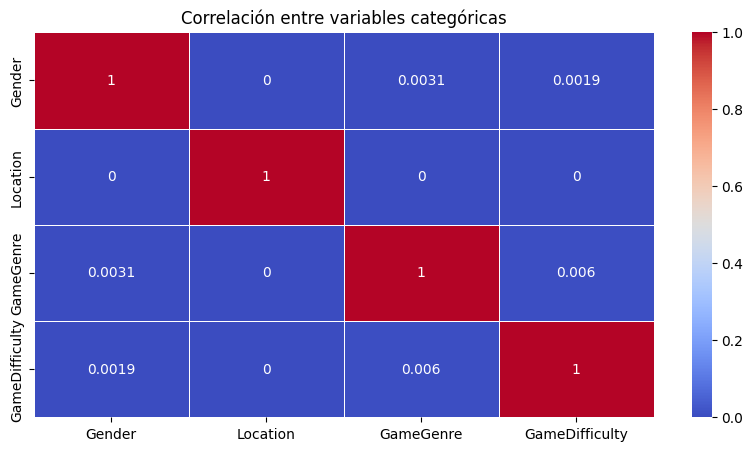

In [56]:
# Relación entre variables categóricas
# Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) # Creamos una tabla de contingencia
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_matrix = np.ones((len(categorical_features), len(categorical_features)))
for i, feature1 in enumerate(categorical_features):
    for j, feature2 in enumerate(categorical_features):
        cramers_v_matrix[i, j] = cramers_v(df[feature1], df[feature2])

plt.figure(figsize=(10, 5))
sns.heatmap(cramers_v_matrix, annot=True, xticklabels=categorical_features, yticklabels=categorical_features, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre variables categóricas')
plt.show()



### Relacion entre toda las variables

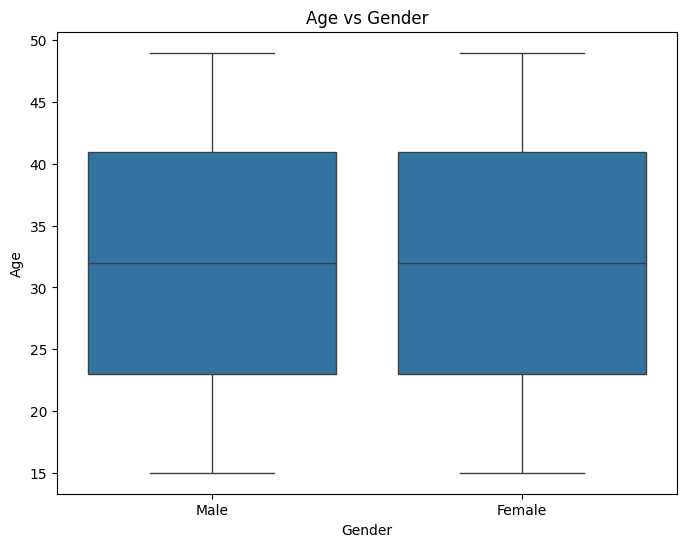

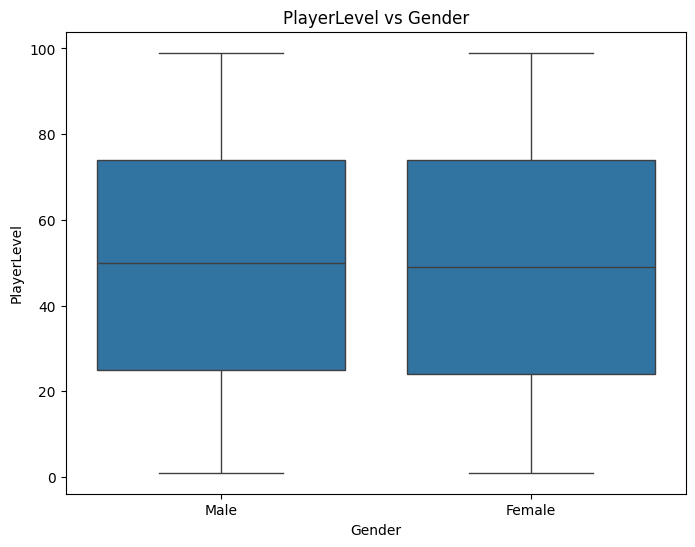

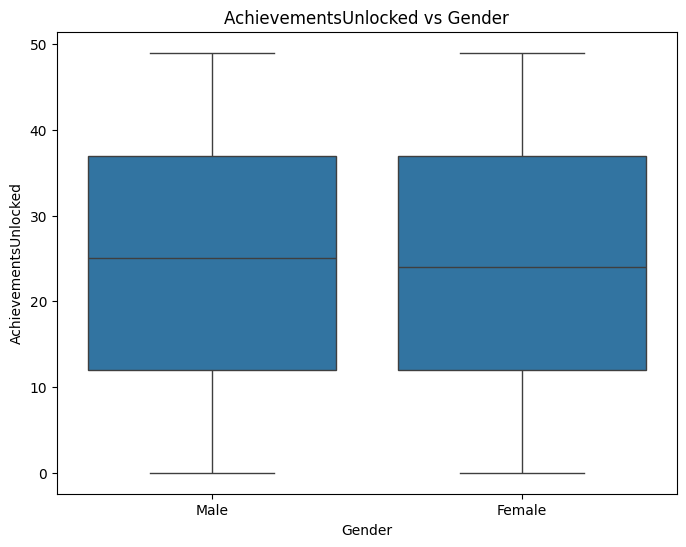

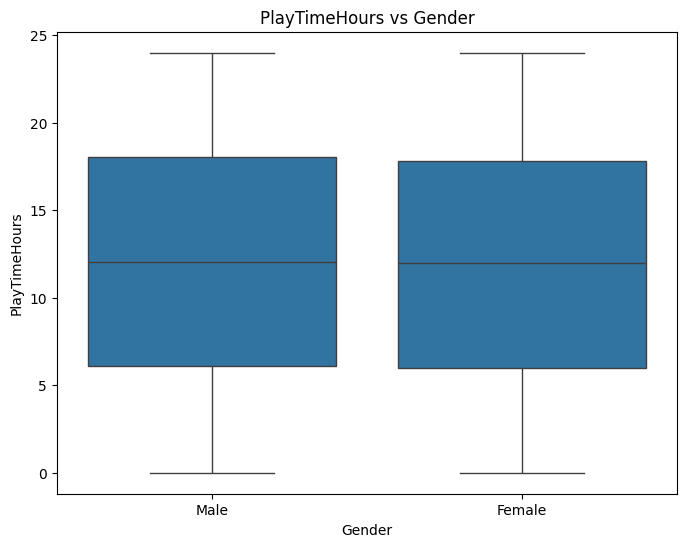

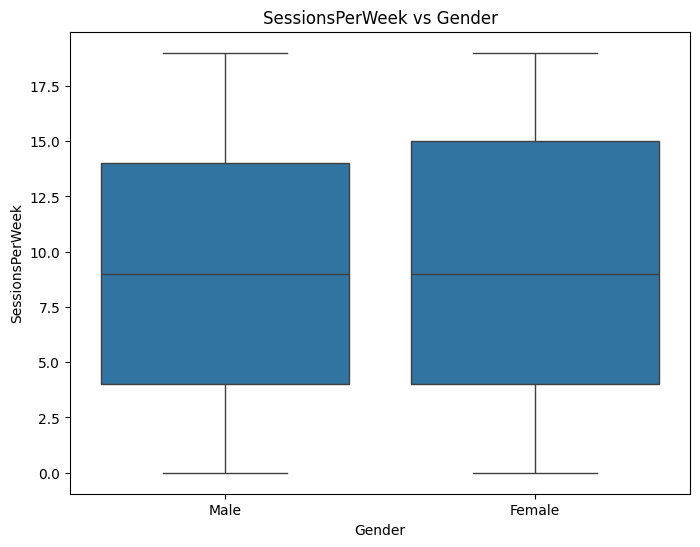

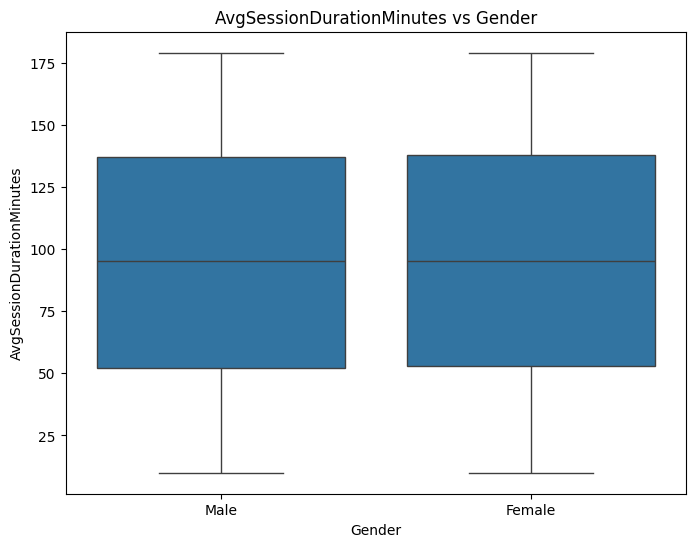

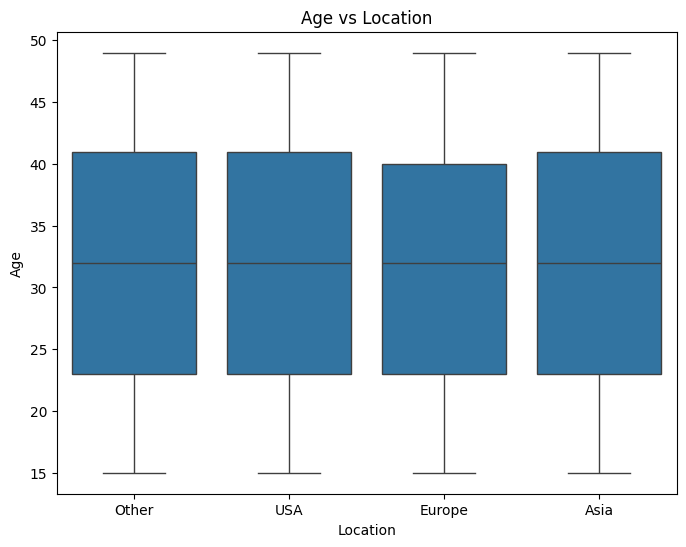

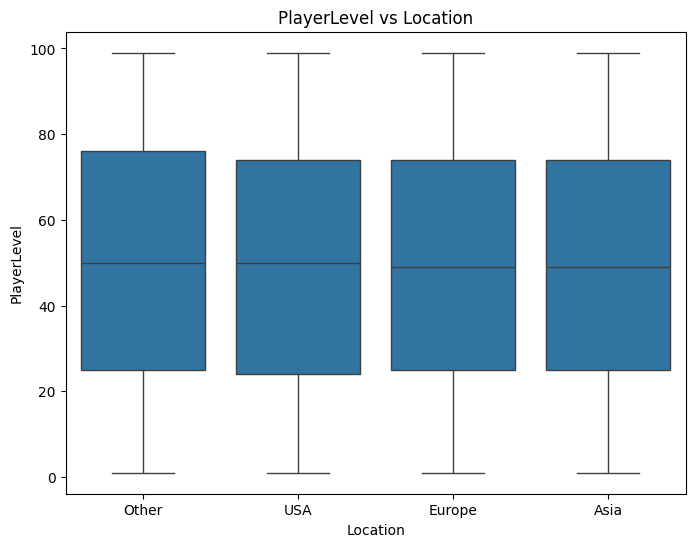

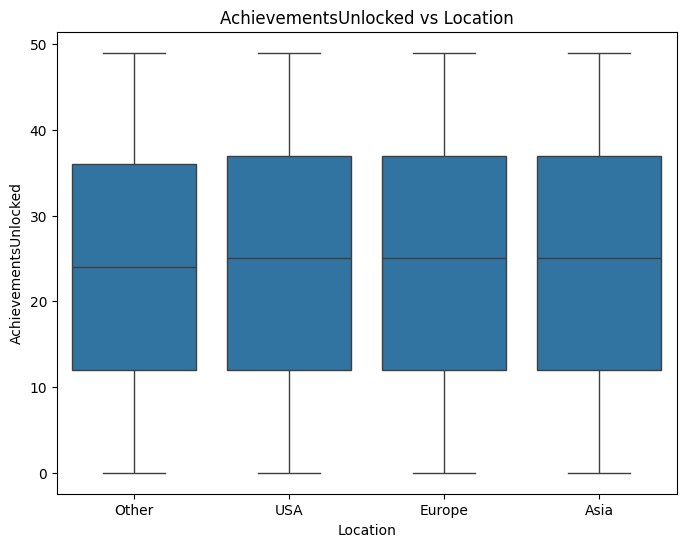

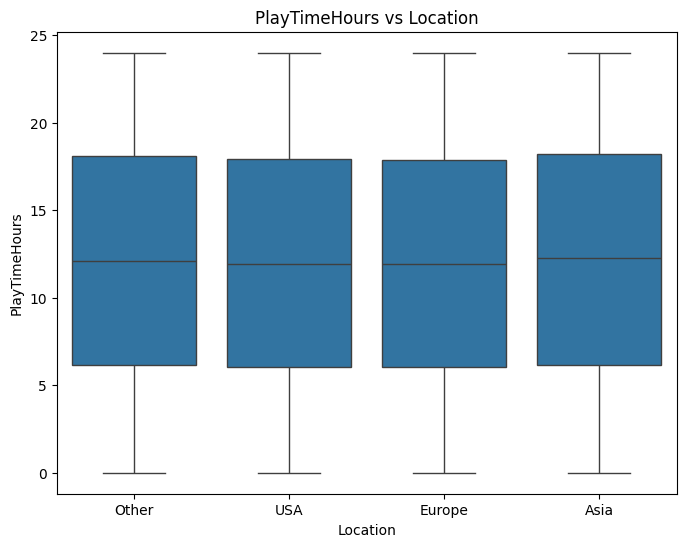

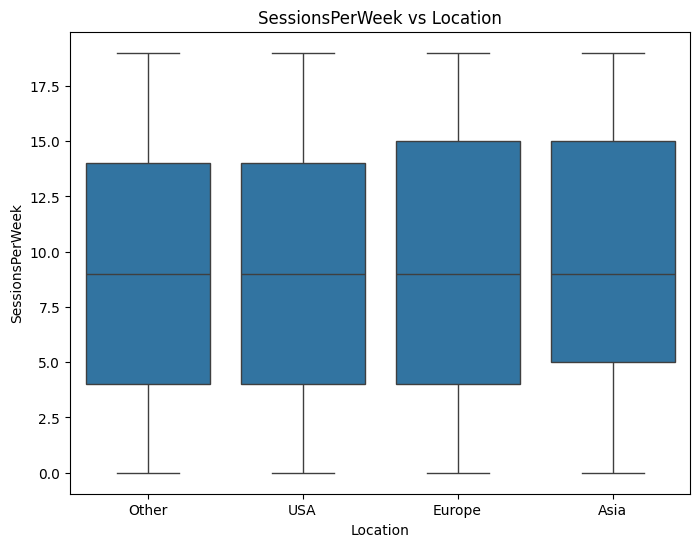

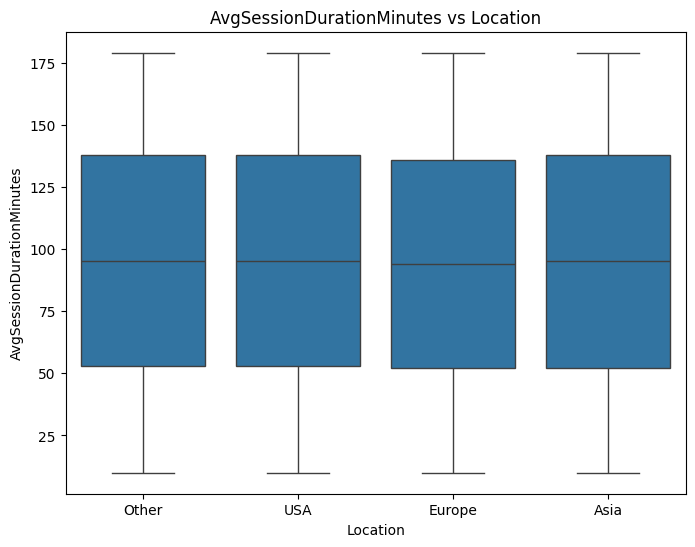

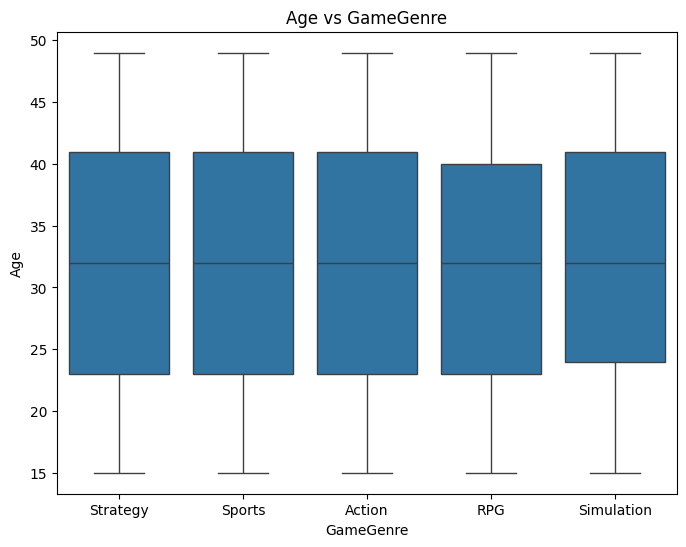

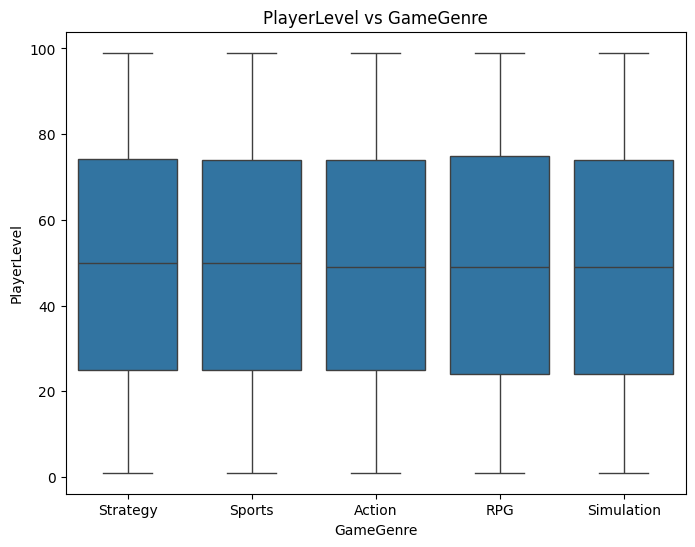

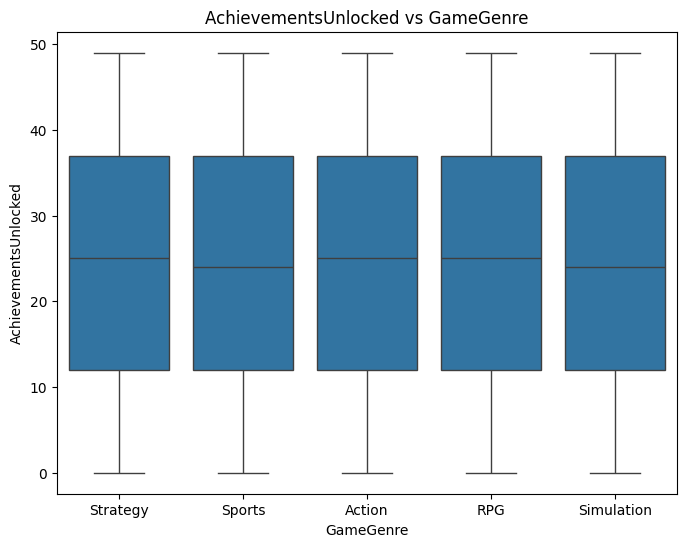

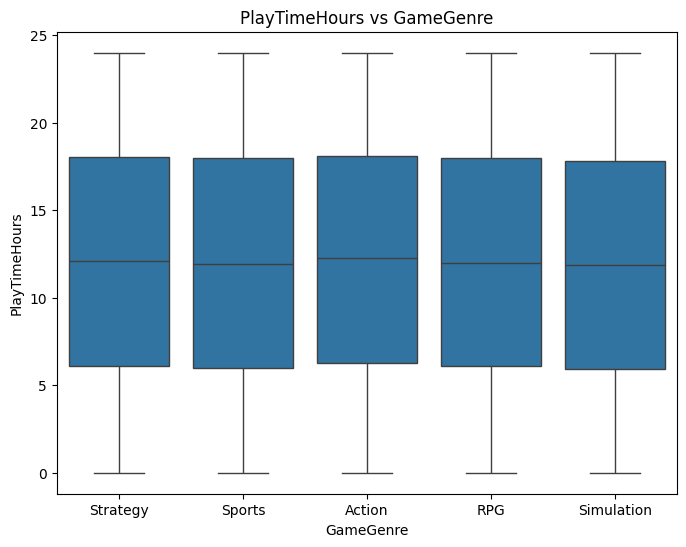

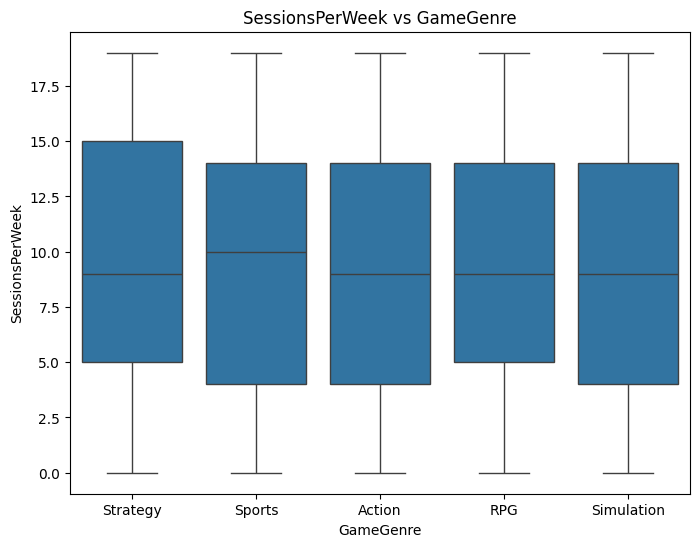

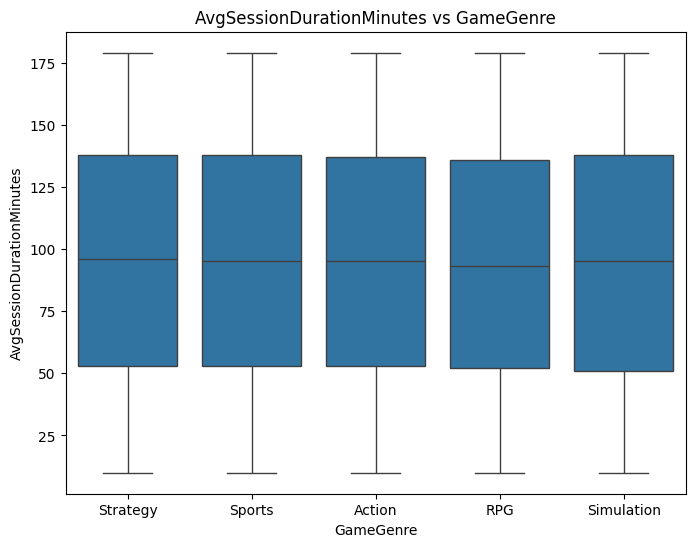

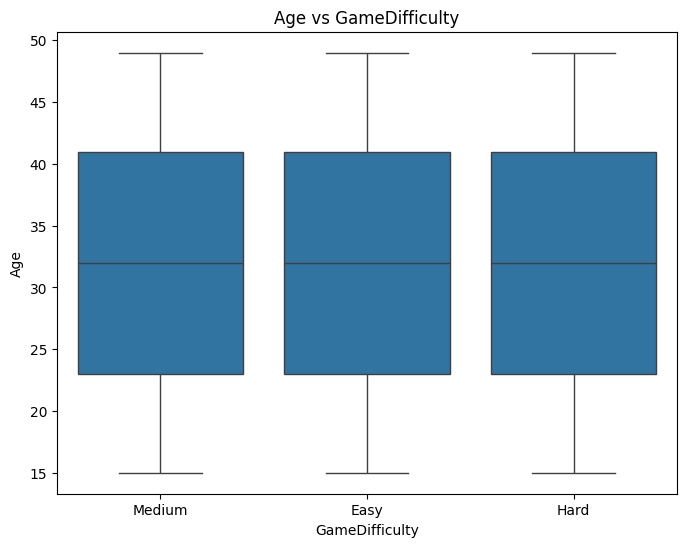

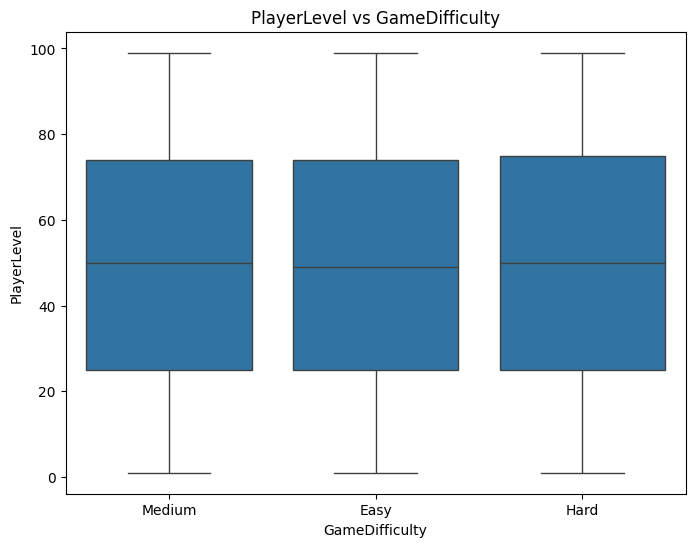

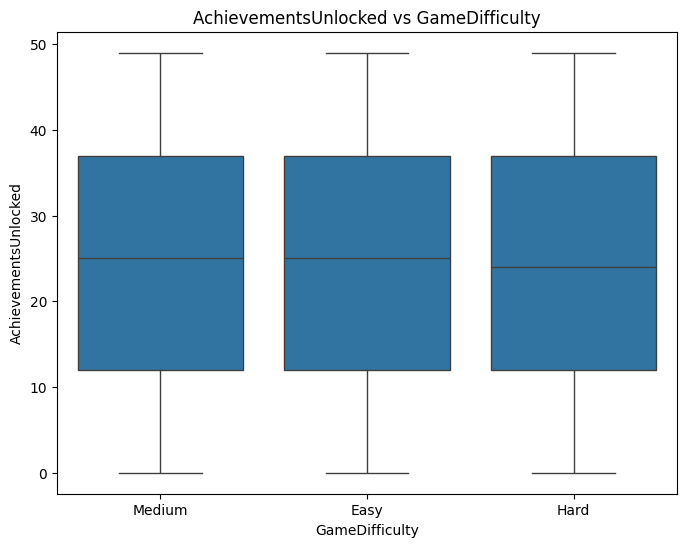

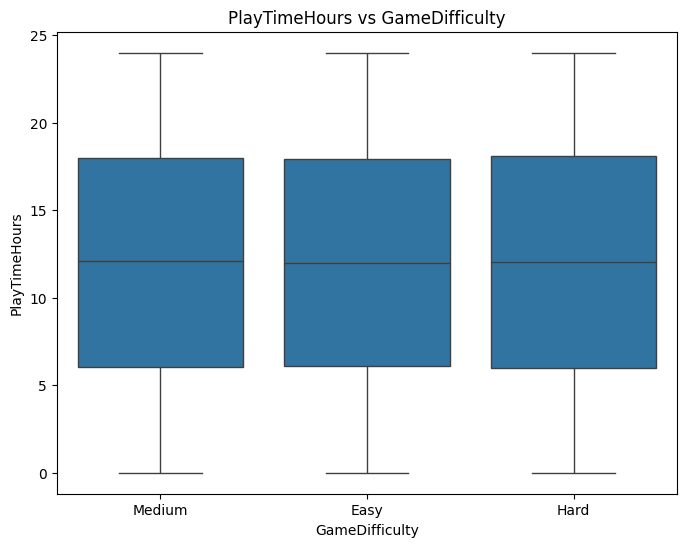

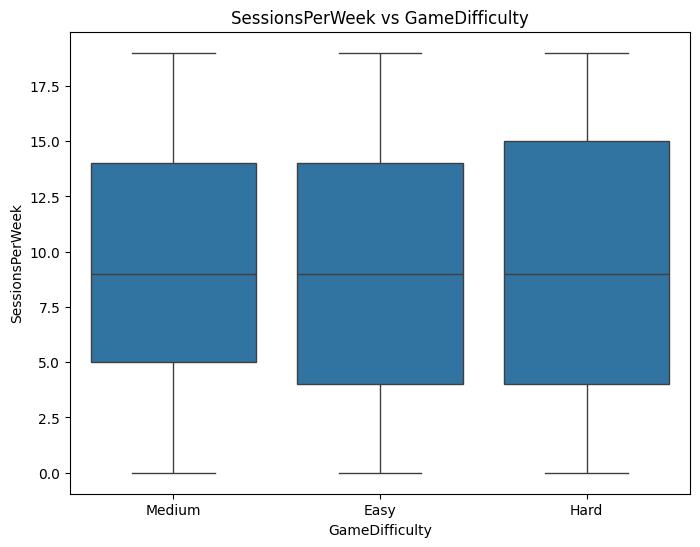

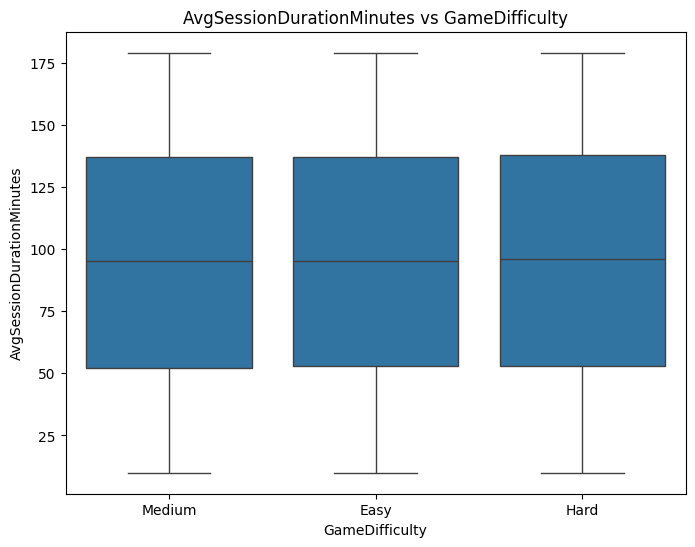

In [57]:
# Relación entre variables categóricas y numéricas

for cat_var in categorical_features:
    for num_var in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_var, y=num_var, data=df)
        plt.title(f"{num_var} vs {cat_var}")
        plt.show()


## Model Training


In [58]:
def encode_categorical_features(df):
    # Encode Gender using Label Encoding
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    
    # Encode Location using One-Hot Encoding
    df = pd.get_dummies(df, columns=['Location'], drop_first=True, prefix='Location')
    
    # Encode GameGenre using One-Hot Encoding
    df = pd.get_dummies(df, columns=['GameGenre'], drop_first=True, prefix='Genre')
    
    # Encode GameDifficulty using Ordinal Encoding 
    difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
    df['GameDifficulty'] = df['GameDifficulty'].map(difficulty_mapping)
    
    # Encode EngagementLevel using Ordinal Encoding 
    engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
    df['EngagementLevel'] = df['EngagementLevel'].map(engagement_mapping)
    
    return df

encoded_data = encode_categorical_features(df)
encoded_data.head()

,PlayerID,Age,Gender,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,0,16.271119,0,2,6,108,79,25,2,False,True,False,False,False,False,True
1,9001,29,1,5.525961,0,2,5,144,11,10,2,False,False,True,False,False,False,True
2,9002,22,1,8.223755,0,1,16,142,35,41,3,False,False,True,False,False,True,False
3,9003,35,0,5.265351,1,1,9,85,57,47,2,False,False,True,False,False,False,False
4,9004,33,0,15.531945,0,2,2,131,95,37,2,True,False,False,False,False,False,False


In [59]:
# Calculate correlations with EngagementLevel
correlations_with_EngagementLevel = encoded_data.corr()['EngagementLevel'].sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlations_with_EngagementLevel.to_frame(name='Correlation with EngagementLevel').reset_index()

# Rename columns for clarity
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)

# Display the correlation table
display(correlation_table)

,Feature,Correlation with EngagementLevel
0,EngagementLevel,1.000000
1,SessionsPerWeek,0.605996
2,AvgSessionDurationMinutes,0.476698
3,AchievementsUnlocked,0.060576
4,PlayerLevel,0.059315
5,InGamePurchases,0.008209
6,Genre_Strategy,0.007700
7,GameDifficulty,0.005057
8,Gender,0.004978
9,Location_USA,0.002499


In [60]:
encoded_data = encoded_data.drop(columns=['PlayerID'])

In [61]:
# Dividir el dataset en variables dependientes e independientes
X = encoded_data.drop(columns=['EngagementLevel']) #Features
y = encoded_data['EngagementLevel'] #Target

In [65]:
# dividimos el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# visualizamos las dimensiones de los datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (32027, 16)
X_test shape: (8007, 16)
y_train shape: (32027,)
y_test shape: (8007,)


In [66]:
# Aplicamos Scaler para estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [71]:
# Inicializamos el modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=4, class_weight='balanced')
}

print("Modelos creados:", list(models.keys()))

Modelos creados: ['Random Forest', 'Gradient Boosting', 'LightGBM']


Training Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           1       0.92      0.88      0.90      2065
           2       0.91      0.95      0.93      3875
           3       0.93      0.88      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.92      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



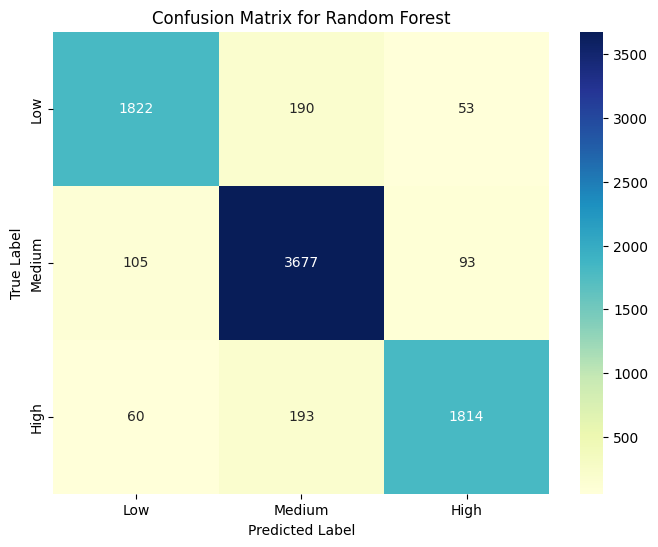

Training Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           1       0.91      0.86      0.89      2065
           2       0.90      0.95      0.92      3875
           3       0.92      0.88      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



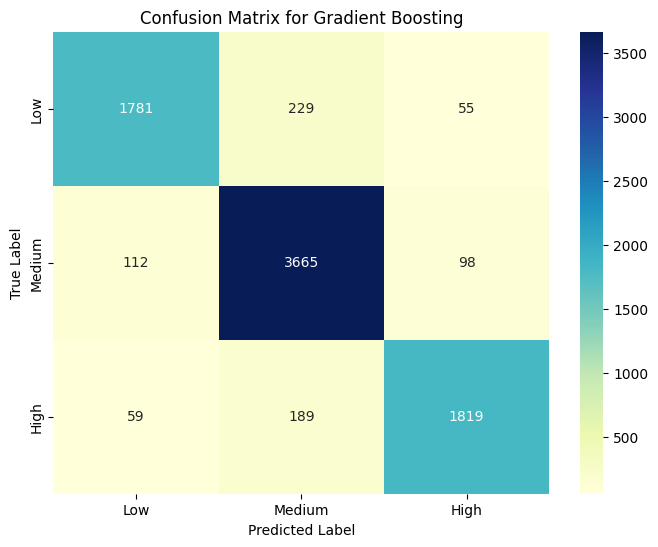

Training LightGBM...


c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




Classification Report for LightGBM:

              precision    recall  f1-score   support

           1       0.89      0.90      0.90      2065
           2       0.92      0.93      0.93      3875
           3       0.92      0.89      0.91      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.91      0.91      8007
weighted avg       0.91      0.91      0.91      8007



c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



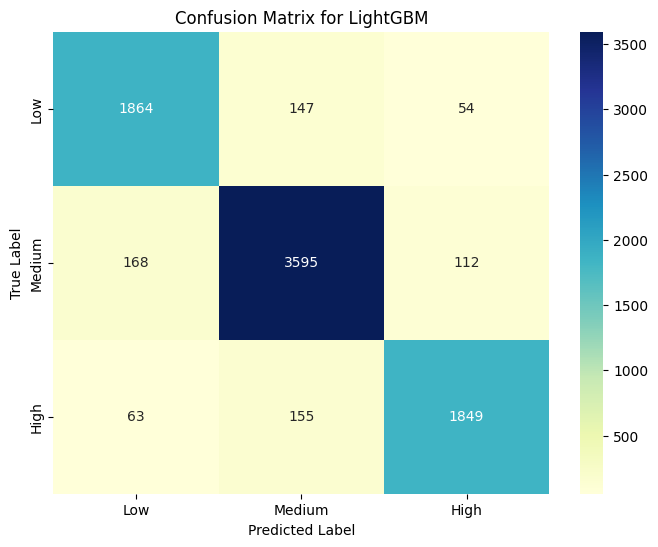

Model Results:


,Model,Accuracy,AUC
0,Random Forest,0.913326,0.943528
1,LightGBM,0.912701,0.946413
2,Gradient Boosting,0.907331,0.945354


In [72]:
# Almacenar los resultados de los modelos
model_results = []

# Entrenar los modelos
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    # predecir en test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calcular accuracy y AUC
    accuracy = model.score(X_test_scaled, y_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr') if y_pred_proba is not None else None
    
    # Almacenar los resultados
    model_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC': auc if auc else 'N/A'
    })
    
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
# Creamos una tabla con los resultados
results_df = pd.DataFrame(model_results).sort_values(by='Accuracy', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Mostramos los resultados
print("Model Results:")
display(results_df)

In [81]:
# Ajustar la variable objetivo para que comience desde 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Entreno con XGBoost
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train_adjusted)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calcular accuracy y AUC
accuracy = model.score(X_test_scaled, y_test_adjusted)
auc = roc_auc_score(y_test_adjusted, model.predict_proba(X_test_scaled), multi_class='ovr')

# Classification Report
print("\nClassification Report for XGBoost:\n")
print(classification_report(y_test_adjusted, y_pred))
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")


c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2065
           1       0.91      0.95      0.93      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007

Accuracy: 0.9178219058323966
AUC: 0.946016497801286


### Modelos y metricas
- XGBoost es la metrica más alta con un 91.78% y un AUC de 0.9460
- Random Forest con un 91.33% y un AUC de 0.9435
- LightGBM en tecero con un 91.27% y un AUC de 0.9464
- Gradient Boosting de ultimo con 90.73% y un AUC de 0.9453

The best model is: LightGBM




c:\Users\vitta\Desktop\F5_Bootcamp\Churn_gaming\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



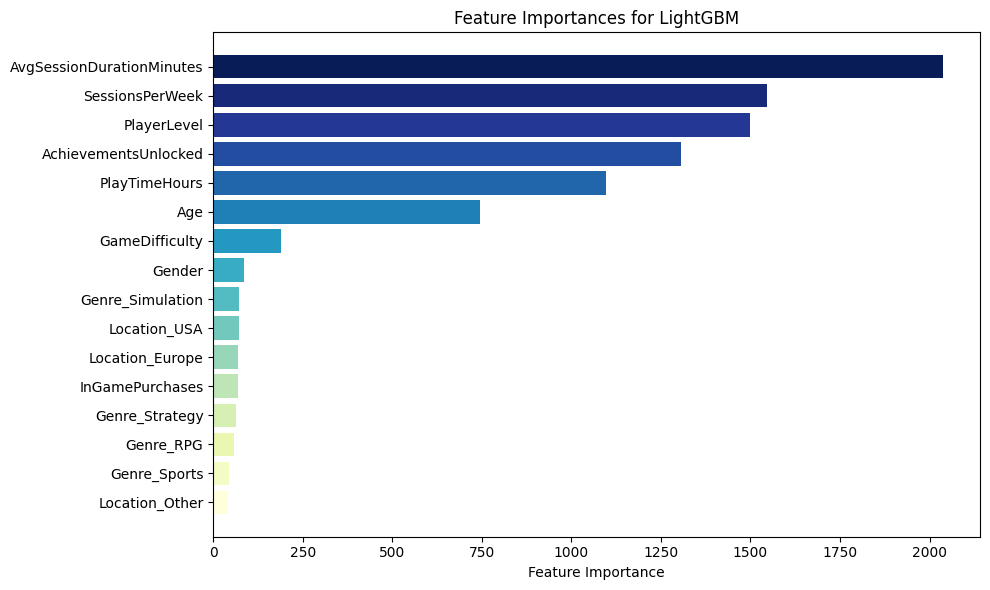

In [82]:
# Identify the best model based on the highest AUC
best_model_name = results_df.loc[results_df['AUC'].idxmax(), "Model"]
print(f"The best model is: {best_model_name}")
print("\n")

best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Plot feature importances 
if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    sorted_idx = feature_importances.argsort()[::-1]

    colors = plt.cm.YlGnBu_r(np.linspace(0, 1, len(feature_importances)))

    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances for {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")

In [83]:
# Guardar el modelo
import joblib
joblib.dump(best_model, 'engagement_level_model.pkl')

print("Modelo guardado exitosamente!")


Modelo guardado exitosamente!
